In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [2]:
df = pd.read_csv("E:\\AUT\\Machine Learning\\ML_HW1\\Decision Tree\\agaricus-lepiota.csv")
#pd.read_excel('tmp.xlsx', index_col=0)
df.shape

(8124, 23)

In [3]:
#Preproccessing 
#df.fillna(np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8124 non-null   object
 1   Unnamed: 1   8124 non-null   object
 2   Unnamed: 2   8124 non-null   object
 3   Unnamed: 3   8124 non-null   object
 4   Unnamed: 4   8124 non-null   object
 5   Unnamed: 5   8124 non-null   object
 6   Unnamed: 6   8124 non-null   object
 7   Unnamed: 7   8124 non-null   object
 8   Unnamed: 8   8124 non-null   object
 9   Unnamed: 9   8124 non-null   object
 10  Unnamed: 10  8124 non-null   object
 11  Unnamed: 11  8124 non-null   object
 12  Unnamed: 12  8124 non-null   object
 13  Unnamed: 13  8124 non-null   object
 14  Unnamed: 14  8124 non-null   object
 15  Unnamed: 15  8124 non-null   object
 16  Unnamed: 16  8124 non-null   object
 17  Unnamed: 17  8124 non-null   object
 18  Unnamed: 18  8124 non-null   object
 19  Unnamed: 19  8124 non-null 

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#%% Label-encoder
temp=df
for i in range(len(df.iloc[0])):
    col=df.iloc[:,i]
    le = preprocessing.LabelEncoder()
    le.fit(col)
    col=le.transform(col)
    temp.iloc[:,i]=col
    Data=np.array(temp)
Data_lable=Data[:,0]
Data_main=Data[:,1:]
Data.shape

(8124, 23)

In [6]:
print(Data)

[[1 5 2 ... 2 3 5]
 [0 5 2 ... 3 2 1]
 [0 0 2 ... 3 2 3]
 ...
 [0 2 2 ... 0 1 2]
 [1 3 3 ... 7 4 2]
 [0 5 2 ... 4 1 2]]


In [13]:
#DecisionTreeClassifier

Train_data, Test_data, Train_lable, Test_lable = train_test_split(Data_main, Data_lable, test_size=0.30, random_state = 1)

decision_tree = DecisionTreeClassifier(random_state=1, max_depth=5)
decision_tree = decision_tree.fit(Train_data, Train_lable)
Test_predict = decision_tree.predict(Test_data)

Con_matrix=confusion_matrix(Test_lable, Test_predict)
print("The confusion matrix is:\n",Con_matrix)

tn, fp, fn, tp = confusion_matrix(Test_lable, Test_predict,labels=[0,1]).ravel()
𝑎𝑐𝑐𝑢𝑟𝑎𝑐𝑦 = (tn+tp)/(tn+tp+fn+fp)
recall = (tp)/(tp+fn)
precision = (tp)/(tp+fp)

print(" The accuracy is ：{}%".format(accuracy*100))
print(" The recall is ：{}%".format(recall*100))
print(" The precision  is ：{}%".format(precision*100))

The confusion matrix is:
 [[1206   30]
 [  15 1187]]
 The accuracy is ：98.15422477440525%
 The recall is ：98.75207986688852%
 The precision  is ：97.53492193919475%


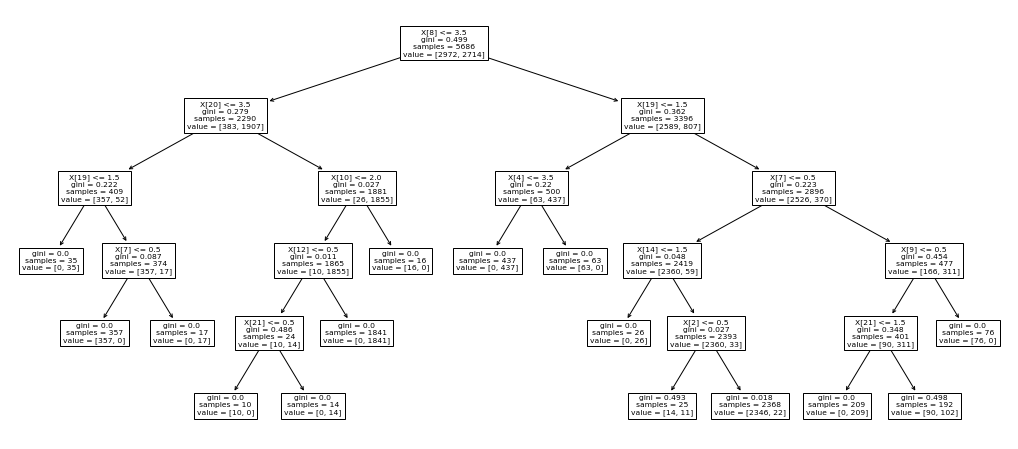

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,8))
plot_tree(decision_tree)
plt.show()